# Testeo del entorno
Vamos a ver si esta todo en orden

In [1]:
import sys
import os
import pandas as pd

# Añadir el directorio raíz del proyecto al PYTHONPATH
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

import config
from stock_trading_env.trading_env import TradingEnv
import gymnasium as gym

import matplotlib.pyplot as plt

Declaración y definicion de variables del entorno

In [5]:
# # Registro del entorno personalizado
gym.envs.registration.register(
    id='TradingEnv-v0',
    entry_point='stock_trading_env.trading_env:TradingEnv',
)


TRAIN_DATA = pd.read_parquet(config.TRAINING_DATA)
# Ahora intenta crear el entorno
env = gym.make(
    "TradingEnv-v0",
    name="BTCUSD",
    df=TRAIN_DATA,
    windows=5,
    positions=[-1, 0, 1],  # -1 (=SHORT), +1 (=LONG)
    initial_position=0,  # Posición inicial
    trading_fees=0.01 / 100,  # 0.01% por compra/venta de acciones
    portfolio_initial_value=10000,  # en FIAT (aquí, USD)
    max_episode_duration=int(len(TRAIN_DATA)*0.8),
)

In [6]:
observation, info = env.reset()

In [7]:
observation

array([[0.09973543, 0.09954441, 0.09979413, 0.09935173, 0.10064267,
        0.10115193, 0.09940537, 0.10771748, 0.10064267, 0.10032854,
        0.07529903, 0.31594148, 0.27947152, 0.47953606, 0.4868559 ,
        0.65532815, 0.10664902, 0.4079599 , 0.        , 0.        ,
        0.        ],
       [0.09978776, 0.10051963, 0.09982034, 0.10057269, 0.10026763,
        0.100885  , 0.09914558, 0.10751403, 0.10026763, 0.09978694,
        0.07309129, 0.37759745, 0.34078112, 0.48334622, 0.48587957,
        0.66420466, 0.10667996, 0.43069643, 0.        , 0.        ,
        0.        ],
       [0.10097104, 0.10167824, 0.10097633, 0.10200296, 0.0999971 ,
        0.10061722, 0.09911341, 0.10751742, 0.0999971 , 0.09924499,
        0.06947608, 0.4467563 , 0.40468687, 0.4917888 , 0.4870302 ,
        0.67835957, 0.1067182 , 0.46200395, 0.        , 0.        ,
        0.        ],
       [0.10236365, 0.10244094, 0.10224007, 0.10252915, 0.09982785,
        0.10040527, 0.09915654, 0.10749277, 0.0998278

El espacio de observaciones tiene 18 variables numéricas (precio, indicadores y tal); y los últimos 3 ceros son las variables dinámicas.

In [8]:
len(env.unwrapped._features_columns), observation.shape

(21, (5, 21))

21 variables, y como la ventana es de 5, cada observación tiene 21 por 5. todo ok.

In [10]:
env.unwrapped._features_columns

['feature_open',
 'feature_high',
 'feature_low',
 'feature_close',
 'feature_SMA_20',
 'feature_SMA_50',
 'feature_EMA_14',
 'feature_BBL_20_2.0',
 'feature_BBM_20_2.0',
 'feature_BBU_20_2.0',
 'feature_BBB_20_2.0',
 'feature_BBP_20_2.0',
 'feature_RSI',
 'feature_MACD',
 'feature_MACD_Signal',
 'feature_MACD_Diff',
 'feature_ATR',
 'feature_CCI',
 'dynamic_feature__0',
 'dynamic_feature__1',
 'dynamic_feature__2']

In [9]:
env.unwrapped.dynamic_feature_functions

[<function stock_trading_env.trading_env.dynamic_feature_last_action_taken(history)>,
 <function stock_trading_env.trading_env.dynamic_feature_real_action_taken(history)>,
 <function stock_trading_env.trading_env.dynamic_feature_asset_quantity(history)>]

Las variables numéricas y dinámicas son las que hemos definido.

El array de precios:

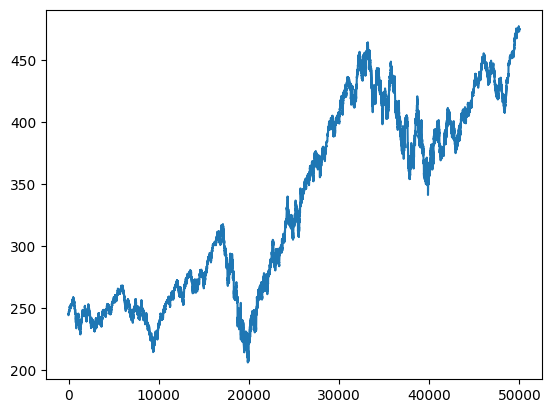

In [9]:
plt.plot(env.unwrapped._price_array)

Mini ciclo:

In [24]:
observation, info = env.reset()
for _ in range(100):
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()

env.close()

BUYING --> 	price:266.149 | 	cost: 266.17561489999997 | port: 9999.9733851 | port-1: 10000.0 | asset : 1
SELLING --> 	price:266.598 | 	profit: 266.5713402 | port: 10000.3957253 | port-1: 10000.3303851 | asset : 0
BUYING --> 	price:266.726 | 	cost: 266.7526726 | port: 10000.369052700002 | port-1: 10000.3957253 | asset : 1
SELLING --> 	price:266.442 | 	profit: 266.4153558 | port: 10000.058408500001 | port-1: 10000.433052700002 | asset : 0
BUYING --> 	price:266.25 | 	cost: 266.276625 | port: 10000.0317835 | port-1: 10000.058408500001 | asset : 1
SELLING --> 	price:265.838 | 	profit: 265.81141620000005 | port: 9999.5931997 | port-1: 9999.7017835 | asset : 0
BUYING --> 	price:265.288 | 	cost: 265.3145288 | port: 9999.566670900002 | port-1: 9999.5931997 | asset : 1
SELLING --> 	price:265.385 | 	profit: 265.3584615 | port: 9999.637132400001 | port-1: 9999.466670900001 | asset : 0
BUYING --> 	price:265.261 | 	cost: 265.28752610000004 | port: 9999.6106063 | port-1: 9999.637132400001 | asset : 1

In [27]:
reward, terminated, truncated, info

(0.0,
 False,
 False,
 {'idx': 5973,
  'step': 100,
  'date': 6101,
  'agent_action': 0,
  'real_action_taken': 0,
  'portfolio_asset_quantity': 0,
  'data_close': 267.65,
  'data_date': Timestamp('2018-10-02 12:02:00'),
  'portfolio_valuation': 9999.345486999999,
  'portfolio_distribution_asset': 0,
  'portfolio_distribution_cash': 9999.345486999999,
  'reward': 0.0,
  'strategy_returns': 0.0})

Todo en orden.